In [2]:
import tifffile as tiff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
MAX_PIXEL_VALUE = 65535 
def new_dataset(image):
    """ make new image (threshold)"""
    new_image = np.zeros_like(image[:, :, 0])
    for (prob,idx) in [(0.4, 6), (0.4, 5), (0.4, 1)]:
        new_image += prob * image[:, :, (idx)]
    # new_image = np.where(new_image > 0.4, 1, 0)
    return new_image
    
def get_img_762bands(path):
    image = tiff.imread(path)
    # img = image[:, :, (6, 5, 1)]#.astype(np.uint8)
    img = np.float32(image)/MAX_PIXEL_VALUE # 정규화
    img = new_dataset(img)
    return np.float32(img) 

def get_mask_arr(path):
    img = tiff.imread(path)
    img = np.float3

In [4]:
BASE = '/mnt/d/Jupyter-Goodyoung/forest/data'
train_meta = pd.read_csv(f'{BASE}/train_meta.csv').sample(n=2500,random_state=42)
test_meta = pd.read_csv(f'{BASE}/test_meta.csv')

# 데이터 위치
IMAGES_PATH = f'{BASE}/train_img/'
MASKS_PATH = f'{BASE}/train_mask/'

In [ ]:
# MASK 손실 값 없다.
# s = pd.read_csv(f'{BASE}/train_meta.csv')['train_mask']
# for name in s:
#     mask =  tiff.imread(f'{MASKS_PATH}/{name}')
#     if len(np.unique(mask)) == 1:
#         print(name)

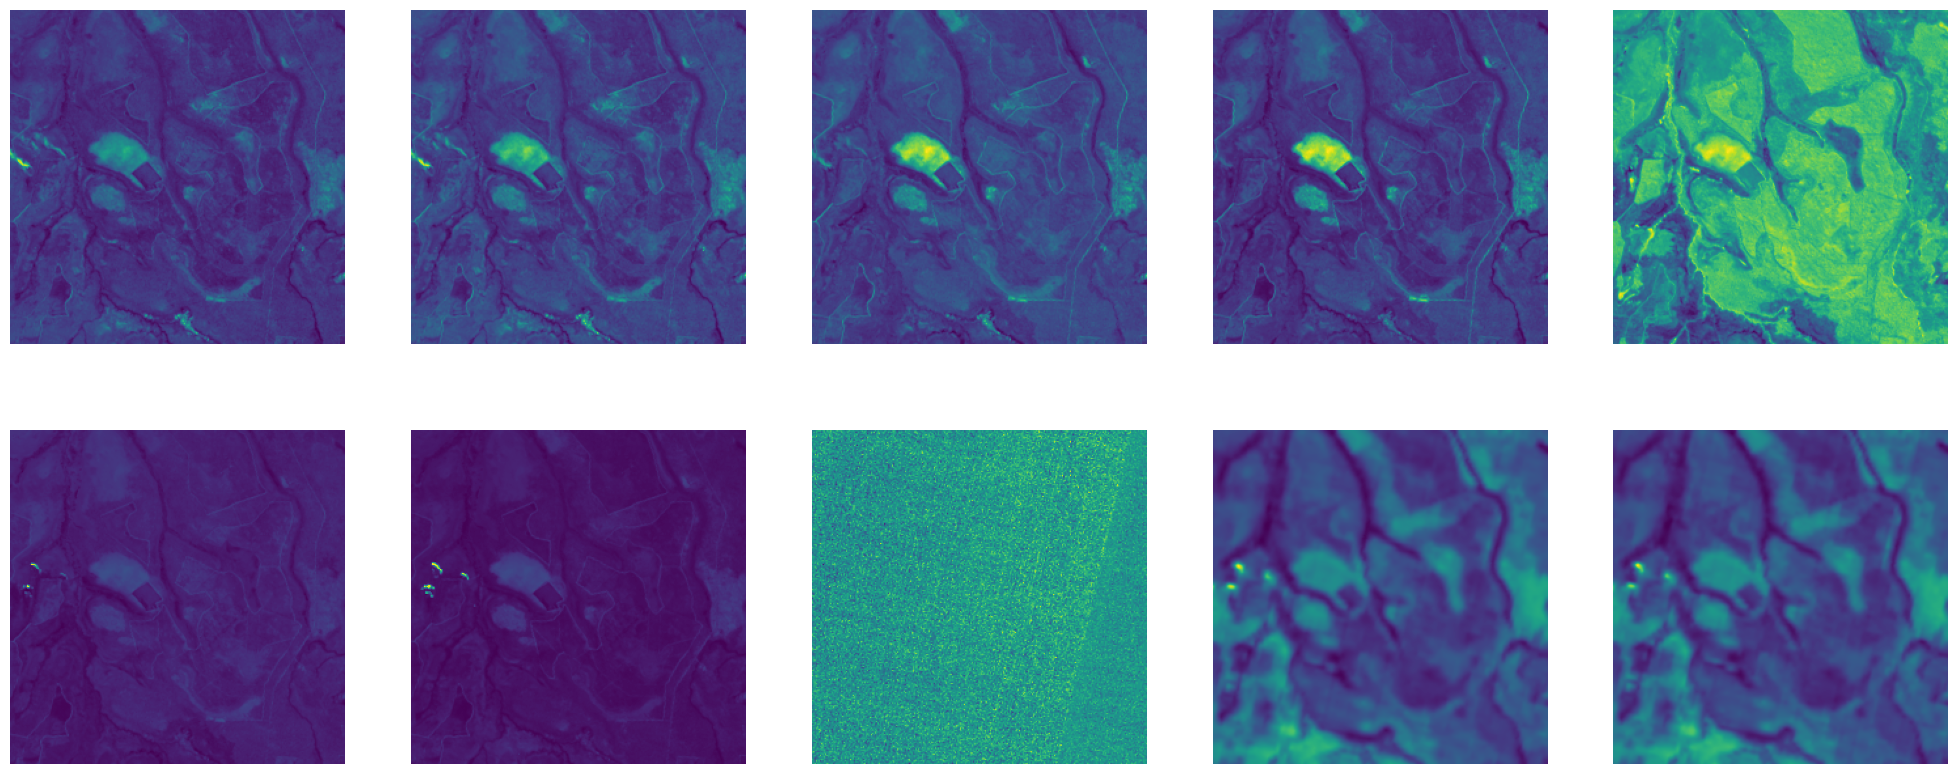

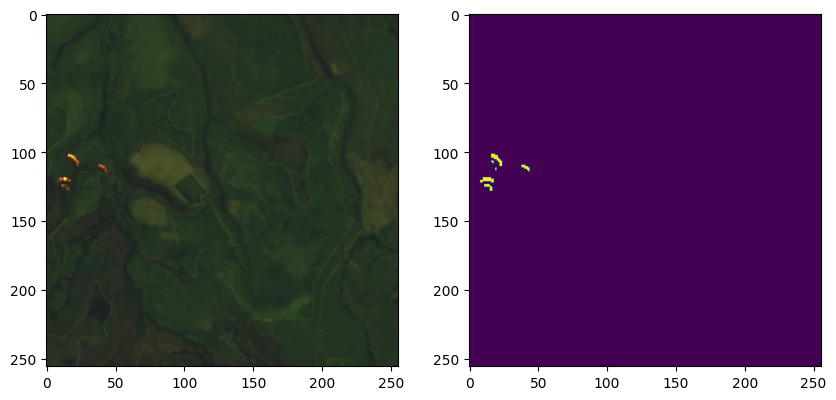

In [5]:
NUM = 23260
image = tiff.imread(f'{IMAGES_PATH}/train_img_{NUM}.tif')
mask = tiff.imread(f'{MASKS_PATH}/train_mask_{NUM}.tif')
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
for idx,ax in enumerate(axes.flatten()):
    ax.imshow(image[:,:,idx])
    ax.axis('off')
plt.show()

plt.figure(figsize=(10, 5)) 
plt.subplot(1,2,1)
plt.imshow(image[:,:,(6,5,1)]/MAX_PIXEL_VALUE)
plt.subplot(1,2,2)
plt.imshow(mask)

In [7]:
import cv2
outputImg8U = cv2.convertScaleAbs(image[:,:,(6,5,1)], alpha=(255.0/65535.0)) # uint8로 변환

In [10]:
image[:,:,(6,5,1)] / MAX_PIXEL_VALUE

array([[[0.16475166, 0.24350347, 0.13797208],
        [0.16276799, 0.24000916, 0.13780423],
        [0.1627985 , 0.24042115, 0.13760586],
        ...,
        [0.13812467, 0.19134813, 0.13574426],
        [0.13649195, 0.19716182, 0.13604944],
        [0.13157855, 0.19299611, 0.13488975]],

       [[0.16490425, 0.24434272, 0.13791104],
        [0.16815442, 0.24820325, 0.13806363],
        [0.16209659, 0.23962768, 0.13756008],
        ...,
        [0.13569848, 0.18416114, 0.1356527 ],
        [0.13609522, 0.19546807, 0.13589685],
        [0.13183795, 0.19185168, 0.13554589]],

       [[0.16496529, 0.24452583, 0.13812467],
        [0.16650645, 0.24548714, 0.13795682],
        [0.16639963, 0.24579232, 0.13780423],
        ...,
        [0.13832303, 0.18301671, 0.13498131],
        [0.13894865, 0.18480201, 0.13592737],
        [0.14189364, 0.18757916, 0.13592737]],

       ...,

       [[0.17601282, 0.19758907, 0.13943694],
        [0.17938506, 0.19731441, 0.13867399],
        [0.1762417 , 0

In [9]:
outputImg8U / 255

array([[[0.16470588, 0.24313725, 0.1372549 ],
        [0.16470588, 0.23921569, 0.1372549 ],
        [0.16470588, 0.23921569, 0.1372549 ],
        ...,
        [0.1372549 , 0.19215686, 0.1372549 ],
        [0.1372549 , 0.19607843, 0.1372549 ],
        [0.13333333, 0.19215686, 0.13333333]],

       [[0.16470588, 0.24313725, 0.1372549 ],
        [0.16862745, 0.24705882, 0.1372549 ],
        [0.16078431, 0.23921569, 0.1372549 ],
        ...,
        [0.1372549 , 0.18431373, 0.1372549 ],
        [0.1372549 , 0.19607843, 0.1372549 ],
        [0.13333333, 0.19215686, 0.1372549 ]],

       [[0.16470588, 0.24313725, 0.1372549 ],
        [0.16470588, 0.24705882, 0.1372549 ],
        [0.16470588, 0.24705882, 0.1372549 ],
        ...,
        [0.1372549 , 0.18431373, 0.13333333],
        [0.1372549 , 0.18431373, 0.1372549 ],
        [0.14117647, 0.18823529, 0.1372549 ]],

       ...,

       [[0.17647059, 0.19607843, 0.14117647],
        [0.18039216, 0.19607843, 0.1372549 ],
        [0.17647059, 0

In [279]:
image2 = tiff.imread(f'{IMAGES_PATH}/train_img_{NUM}.tif')

In [280]:
outputImg8U = cv2.convertScaleAbs(image2[:,:,(6,5,1)], alpha=(255.0/65535.0)) # uint8로 변환

In [141]:
import cv2
s = cv2.threshold(image2, 0.14872968642710002, 1, cv2.THRESH_BINARY)

In [262]:
test = np.mean(outputImg8U[:,:,(6,5,1)],axis=2)

In [266]:
test = test.astype(np.uint8)

In [267]:
test

array([[46, 46, 46, ..., 39, 40, 39],
       [46, 47, 45, ..., 39, 40, 39],
       [46, 46, 46, ..., 38, 39, 39],
       ...,
       [43, 43, 43, ..., 40, 39, 38],
       [41, 39, 41, ..., 37, 38, 37],
       [39, 37, 36, ..., 36, 37, 37]], dtype=uint8)

In [268]:
t, t_otsu = cv2.threshold(test, -1,255 , cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold:', t)

otsu threshold: 45.0


In [ ]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


In [287]:
cv2.cvtColor(outputImg8U,cv2.COLOR_BGR2GRAY)

array([[52, 51, 51, ..., 43, 44, 43],
       [52, 52, 51, ..., 42, 44, 43],
       [52, 52, 52, ..., 42, 42, 43],
       ...,
       [45, 45, 44, ..., 45, 43, 43],
       [43, 41, 43, ..., 41, 42, 41],
       [41, 39, 38, ..., 40, 41, 41]], dtype=uint8)

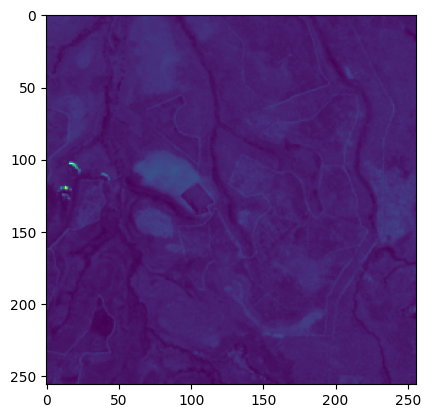

In [294]:
plt.imshow(cv2.cvtColor(outputImg8U,cv2.COLOR_BGR2GRAY),)

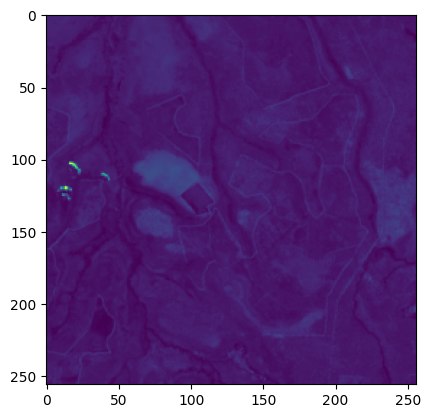

In [286]:
plt.imshow(np.mean(img[:,:,(6,5,1)],axis = 2))

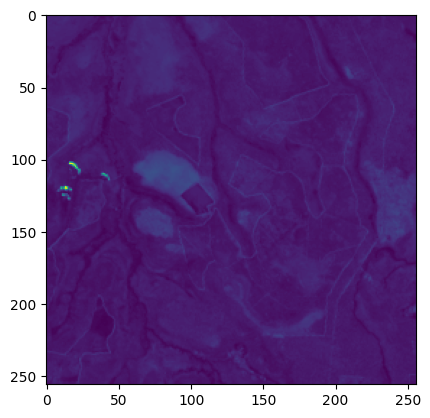

In [271]:
plt.imshow(test)

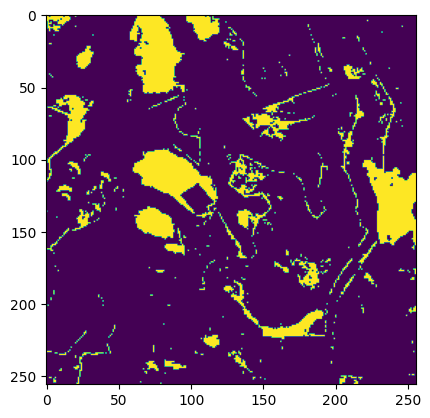

In [270]:
plt.imshow(t_otsu)

In [87]:
s = image[:,:,(6,5,1)]/MAX_PIXEL_VALUE

a = np.where(mask==1)[0]
b = np.where(mask==1)[0]

In [82]:
mx = []
for i in range(len(a)):
    mx.append(np.sum(s[a[i]] [b[i]]))

In [84]:
a = np.where(mask!=1)[0]
b = np.where(mask!=1)[0]
mx2 =[]
for i in range(len(a)):
    mx2.append(np.sum(s[a[i]] [b[i]]))
print(np.mean(mx)*256,np.mean(mx2)*256)

123.53474844175535 126.55278332146472


In [88]:
a[0],b[0]

(102, 102)

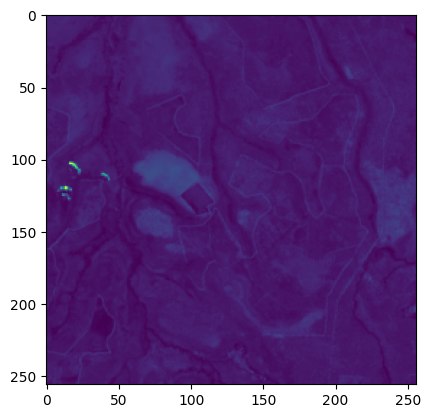

In [56]:
plt.imshow(np.mean(img[:,:,(6,5,1)],axis = 2))

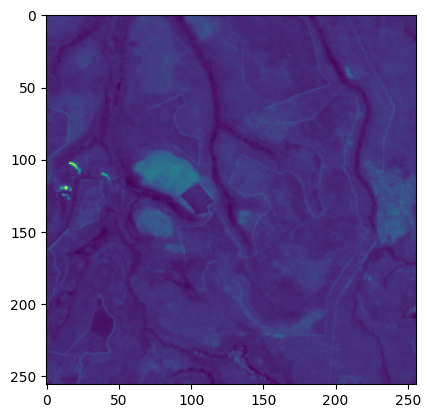

In [57]:
plt.imshow(np.mean(img[:,:,:],axis = 2))

(array([[247.,   9.,   0., ...,   0.,   0.,   0.],
        [240.,  16.,   0., ...,   0.,   0.,   0.],
        [236.,  20.,   0., ...,   0.,   0.,   0.],
        ...,
        [215.,  41.,   0., ...,   0.,   0.,   0.],
        [208.,  48.,   0., ...,   0.,   0.,   0.],
        [212.,  44.,   0., ...,   0.,   0.,   0.]]),
 array([0.12162458, 0.18104677, 0.24046896, 0.29989114, 0.35931334,
        0.41873553, 0.47815773, 0.53757989, 0.59700209, 0.65642428,
        0.71584648]),
 <a list of 256 BarContainer objects>)

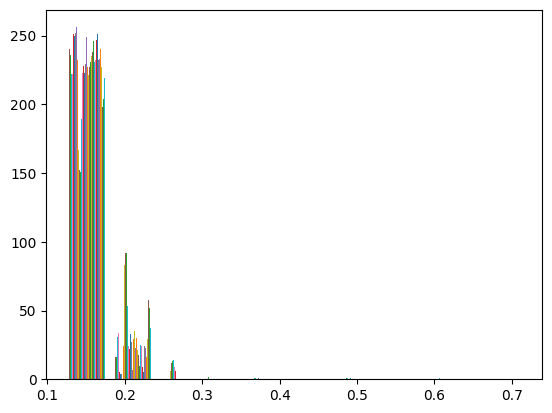

In [58]:
plt.hist(np.mean(img[:,:,(6,5,1)],axis = 2))

(array([[ 24., 232.,   0., ...,   0.,   0.,   0.],
        [ 36., 219.,   1., ...,   0.,   0.,   0.],
        [ 52., 200.,   4., ...,   0.,   0.,   0.],
        ...,
        [ 15., 214.,  27., ...,   0.,   0.,   0.],
        [ 16., 215.,  25., ...,   0.,   0.,   0.],
        [ 15., 221.,  20., ...,   0.,   0.,   0.]]),
 array([0.18033722, 0.20104875, 0.22176027, 0.24247181, 0.26318333,
        0.28389487, 0.30460641, 0.32531792, 0.34602946, 0.36674097,
        0.38745251]),
 <a list of 256 BarContainer objects>)

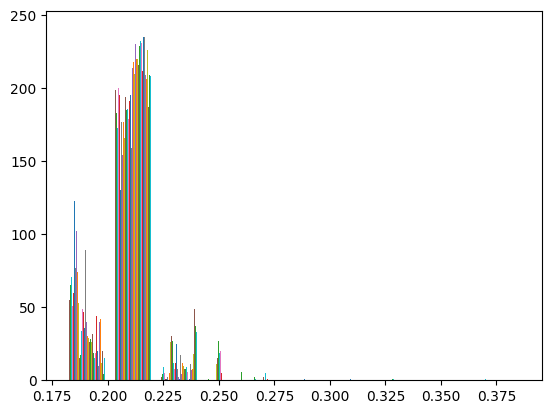

In [48]:
plt.hist(np.mean(img[:,:,:],axis = 2))

In [ ]:
def new_dataset(image):
    """ make new image (threshold)"""
    new_image = np.zeros_like(image[:, :, 0])
    for (prob,idx) in [(0.4, 6), (0.4, 5), (0.4, 1)]:
        new_image += prob * image[:, :, (idx)]
    # new_image = np.where(new_image > 0.4, 1, 0)
    return new_image